
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [4]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [5]:

import PDFshapingUtils as PDF_tk


In [6]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [7]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [8]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [9]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

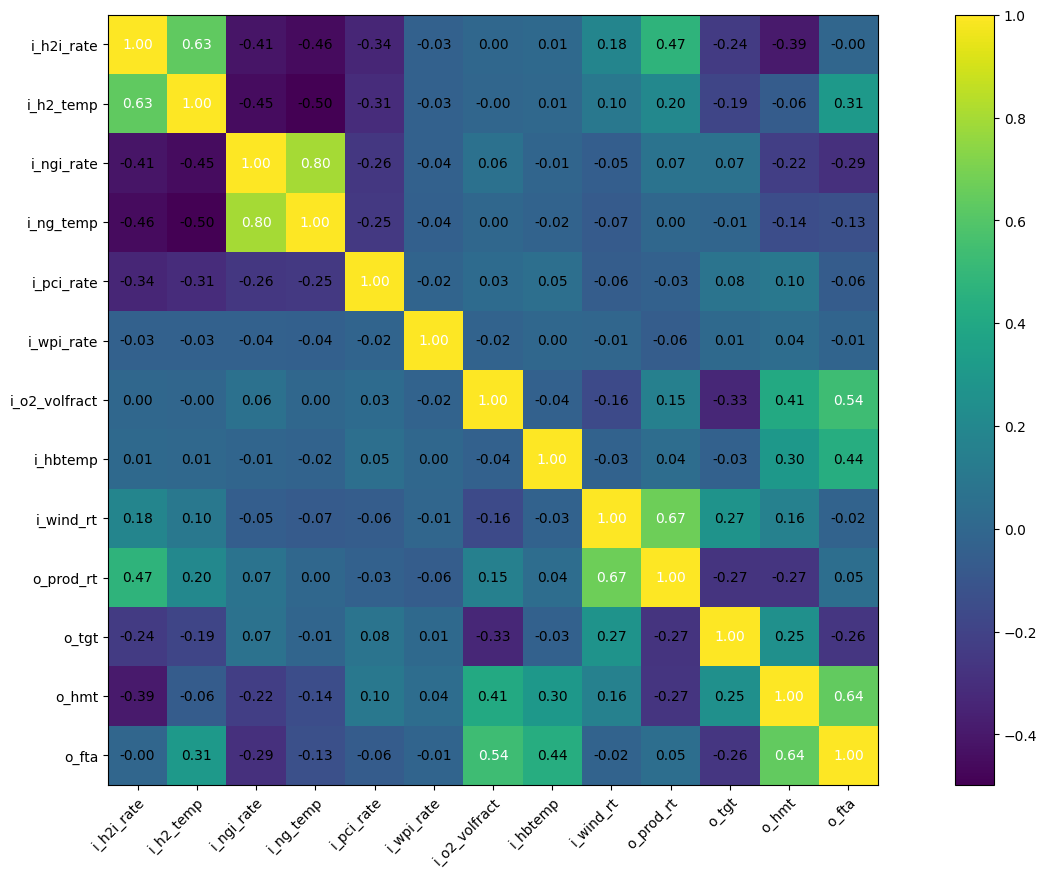

In [10]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [11]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [12]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [13]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [14]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [15]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [16]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

'''



from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca


'''


'\n\n\n\nfrom sklearn.decomposition import PCA\n\n# Instantiate PCA to reduce to 4 components\npca = PCA(n_components=4)\n\n# Fit on training data and transform both train and test\nX_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)\nX_test_pca  = pca.transform(PDFshapingOBJ.X_test)\n\n# Replace the original inputs with PCA-reduced versions\nPDFshapingOBJ.X_train = X_train_pca\nPDFshapingOBJ.X_test  = X_test_pca\n\n\n'

In [18]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [19]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [20]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [21]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [22]:

n_inputs  = 7    ## 4     ## 7
n_outputs = 4


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(n_inputs ,n_outputs)       
        
        ## F2
        self.f2_linear1 = nn.Linear(n_inputs , 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, n_outputs)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [23]:

n_inputs  = 7    ## 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [24]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     F1plusF2_SIO_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [25]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.7998447418212891
100 ..... 0.2161220759153366
200 ..... 0.23797495663166046
300 ..... 0.30698493123054504
400 ..... 0.4030553996562958
500 ..... 0.3243449628353119
600 ..... 0.1993696689605713
700 ..... 0.14790430665016174
800 ..... 0.5826584100723267
900 ..... 0.3506414592266083


In [26]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.8498, 1298.7267, 8421.4424, 2305.7786]])
y_deviations: tensor([[  50.7269,  527.0339, 1514.8402,  211.7473]])
x_means: tensor([[  12.4756,   18.4466,   41.0810,   25.5789,  266.1665, 1438.1755,
          198.4046]])
x_deviations: tensor([[ 15.3295,  44.9238,  46.3880,   3.2985, 357.8368, 158.3139,  26.4842]])


In [27]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.1229,  771.6928, 6906.6021, 2094.0312]])
tensor([[ 148.5767, 1825.7605, 9936.2822, 2517.5259]])


In [28]:

print(PDFshapingOBJ.x_means -  PDFshapingOBJ.x_deviations)
print(PDFshapingOBJ.x_means +  PDFshapingOBJ.x_deviations)


tensor([[  -2.8539,  -26.4772,   -5.3070,   22.2804,  -91.6703, 1279.8617,
          171.9204]])
tensor([[  27.8051,   63.3704,   87.4690,   28.8774,  624.0033, 1596.4894,
          224.8888]])



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

##x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 7])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [38]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 7    # 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[ 200.3310, -986.9095,  322.9229,   71.1942,  -36.1495, -145.3609,
           58.0489]], grad_fn=<AddBackward0>)



## Approach


In [53]:

import numpy as np
from numpy.linalg import norm

# --- distance function ---
def euclid(a, b):
    return norm(a - b)



In [54]:

def solve_minimum_norm_update_LM(x0, target_y, lambda_reg=1e-2):

    # prepare x
    x = x0.detach().clone().requires_grad_(True)

    # compute Jacobian and residual
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    current_y = wrapped_model(x)
    delta_y = (target_y - current_y).view(-1)   # [4]

    # reshape Jacobian to [4,7]
    J = J.squeeze(0)  # [4, 7]

    # LM update:  (Jᵀ J + λ I) Δx = Jᵀ Δy

    JT = J.T                     # [7,4]
    JTJ = JT @ J                 # [7,7]
    A = JTJ + lambda_reg * torch.eye(JTJ.shape[0])   # [7,7]
    b = JT @ delta_y             # [7]

    # solve the linear system A Δx = b
    delta_x = torch.linalg.solve(A, b)

    # optional: limit step size for safety
    step_limit = 5.0
    norm = delta_x.norm()
    if norm > step_limit:
        delta_x = delta_x * (step_limit / norm)

    return delta_x.view_as(x0)



In [55]:



def solve_minimum_norm_update(x0, target_y):

    x = x0.detach().clone().requires_grad_(True)

    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
 
    # FIX: Correct Jacobian and delta_y shapes
    J = J.squeeze(0)              # [4, 7]
    ##delta_y = delta_y.view(-1)    # [4]
    delta_y = delta_y.detach().view(-1)


   
    # SVD pseudoinverse
    ##U, S, Vt = torch.linalg.svd(J)      # U=[4,4], S=[4], Vt=[4,7]
    U, S, Vt = torch.linalg.svd(J, full_matrices=False)
    
  
    
    S_inv = S / (S*S + 1e-6)
    J_pinv = Vt.T @ torch.diag(S_inv) @ U.T   # (7×4)(4×4)(4×4) → 7×4

    delta_x = J_pinv @ delta_y

    # NEW: normalize direction so updates have power
    delta_x = delta_x / (delta_x.norm() + 1e-6)

    
    
    delta_x = torch.clamp(delta_x, -10, 10)

    return delta_x.view_as(x0)






## NO LM


In [56]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    
    for j in range(10):
        
        delta_x  = solve_minimum_norm_update(   x_temp, target_y )
        ## delta_x  = solve_minimum_norm_update_LM(x_temp, target_y, lambda_reg=1e-2)
        ## x_temp   = x_temp + delta_x
        ##x_temp   = x_temp + 0.01 * delta_x 
        ##x_temp   = x_temp + 5.0 * delta_x
        
        
        x_temp = x_temp + delta_x



        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    ## x_new_solution    = pca.inverse_transform( x_new_np   )
    ## x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_np )
    print( x_real_np )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')



[  -2.7225223    -5.0925045   156.88214      26.128983      0.75133765
 1200.7504      196.81662   ]
[   0.    0.  150.   30.    0. 1448.  195.]
1
********************************
[  -0.84528977   -1.0316296   151.96387      24.620792      0.29849157
 1199.6764      186.2789    ]
[  10.    0.  100.   24.  300. 1480.  160.]
2
********************************
[  -4.9331264   -1.8513182  150.88058     25.411251     0.5749093
 1200.5465     190.43709  ]
[   0.    0.   41.   21.    0. 1448.  195.]
3
********************************
[  -4.786764     -4.405174    155.03076      25.363646      0.70711464
 1200.3798      190.2492    ]
[   0.   30.   20.   27.    0. 1480.  160.]
4
********************************
[  -3.0557737     1.5712031   145.61705      26.280565     -0.50512934
 1199.6056      189.98611   ]
[   0.    0.   80.   27.    0. 1200.  195.]
5
********************************
[  -0.3260792     0.1246578   149.73773      25.694471      0.18908998
 1199.8926      187.13109   ]
[  20.

[  -1.4523927    -3.1527274   153.3864       25.18329       0.75514084
 1200.7911      187.73917   ]
[  40.    0.    0.   30.  600. 1480.  160.]
74
********************************
[   0.12477151    0.6569884   149.24289      27.046848     -0.37766206
 1199.6234      202.85115   ]
[  20.    0.   70.   30.  300. 1480.  230.]
75
********************************
[   0.21404114    0.9847051   148.11784      24.26123       0.00650004
 1199.4575      186.04875   ]
[  10.    0.  100.   21.  300. 1480.  160.]
76
********************************
[   1.5414954    1.9194094  147.2944      25.588045    -0.4431942
 1199.4551     199.96149  ]
[  20.    0.   90.   21.  300. 1600.  230.]
77
********************************
[  -2.6895459    -2.1849601   152.25218      26.294327      0.12071821
 1200.0323      199.69226   ]
[  10.    0.   80.   30.  300. 1200.  195.]
78
********************************
[  -0.2639639    1.0528371  149.03546     26.257877    -0.5345479
 1198.4996     188.7965   ]
[  10.  

[  -2.3820024    -1.6259862   152.03877      27.957664      0.35053945
 1199.8162      187.94768   ]
[  40.    0.    0.   30.  300. 1600.  195.]
150
********************************
[  -0.07879382    3.5225117   146.116        25.519934     -0.6735878
 1198.8375      190.17851   ]
[   0.  175.    0.   24.    0. 1200.  195.]
151
********************************
[  -1.1087989   -4.512995   154.37634     25.071758     0.7319602
 1201.6001     198.20956  ]
[  40.    0.    0.   24. 1200. 1600.  230.]
152
********************************
[  -1.669278     -1.6274418   152.00351      23.713476     -0.03441226
 1200.1571      204.16405   ]
[   0.   90.   60.   21.    0. 1480.  230.]
153
********************************
[  -3.0201316     0.8825849   146.95407      26.459211     -0.62088454
 1199.39        199.36336   ]
[   0.   90.    0.   27.    0. 1200.  195.]
154
********************************
[  -4.359901     -0.25585374  147.49298      28.679626     -0.05000309
 1200.0205      189.19962  

[  -3.8824894   -3.9228122  154.14561     26.39737      0.7666572
 1200.7853     191.26799  ]
[   0.    0.   41.   27.    0. 1448.  195.]
226
********************************
[  -3.186069     -4.0014176   154.4047       27.965088      0.44011423
 1200.5277      200.15736   ]
[  30.    0.   60.   30.  300. 1600.  195.]
227
********************************
[  -3.3357344   -1.9613789  151.89601     24.754332     0.0486978
 1200.0717     202.78824  ]
[  30.    0.    0.   21.  600. 1600.  230.]
228
********************************
[  -4.4360723   -3.9708998  154.28476     29.050686     0.0963129
 1199.5353     193.31575  ]
[  20.    0.    0.   27.  600. 1600.  230.]
229
********************************
[  -0.74986994   -1.5963132   152.24869      25.214937      0.25364223
 1199.7911      187.50952   ]
[  20.    0.    0.   27. 1200. 1200.  160.]
230
********************************
[   2.5725076     3.539042    145.5375       25.06997      -0.69186485
 1199.6974      201.12021   ]
[  20.    

[  -1.8654879   -3.9171786  156.03513     26.334438     0.8648081
 1201.0466     190.83636  ]
[   0.    0.  150.   30.    0. 1448.  195.]
304
********************************
[  -1.7212033    -1.491798    151.16217      24.95129      -0.09628889
 1200.1154      203.35211   ]
[  20.    0.   50.   27.  300. 1600.  230.]
305
********************************
[  -3.0249982     0.7972584   147.25807      24.102724     -0.48810863
 1199.9794      203.0821    ]
[   0.    0.  100.   27.    0. 1200.  230.]
306
********************************
[  -0.01723678   -0.5612272   150.81506      23.825691      0.35997096
 1200.085       185.77249   ]
[  30.    0.   40.   21.  300. 1480.  160.]
307
********************************
[  -1.0087715    -0.33052048  151.2836       26.895592      0.10447662
 1200.0856      198.72818   ]
[   0.   30.  120.   30.    0. 1480.  195.]
308
********************************
[  -3.9125626    -3.3264198   154.0243       26.417942      0.26113924
 1200.5073      200.33968 

[   1.7226262     1.3087852   149.725        27.168652     -0.16680017
 1200.1936      200.42827   ]
[  10.    0.  100.   21.  300. 1600.  230.]
380
********************************
[  -2.7296174    -3.1468313   153.98624      26.40909       0.47752208
 1200.1445      189.14615   ]
[   0.   60.   40.   24.    0. 1480.  195.]
381
********************************
[  -5.6025057    -4.1186833   154.03136      25.565626      0.37186304
 1200.2496      195.80077   ]
[   0.    0.   41.   27.    0. 1200.  195.]
382
********************************
[  -2.772193     -2.5499003   153.33672      25.780743      0.49436963
 1200.0074      186.98169   ]
[   0.    0.   41.   27.    0. 1448.  160.]
383
********************************
[  -3.7623398    -1.8964168   153.18486      26.043085      0.80877215
 1200.5178      191.19785   ]
[  10.    0.    0.   24.  300. 1600.  195.]
384
********************************
[  -2.7916763    0.8248726  147.58847     26.698132    -0.622363
 1199.0642     197.36397 

[  -0.783873     -0.39768222  149.55997      24.238485     -0.37270546
 1199.5645      202.70212   ]
[   0.   80.  120.   27.    0. 1480.  195.]
456
********************************
[  -2.5665329    -1.86432     152.21722      26.155977     -0.09288632
 1199.8427      202.62117   ]
[  30.    0.    0.   27. 1200. 1200.  230.]
457
********************************
[  -2.0858557    -1.9712263   153.66528      26.447775      0.05234269
 1199.945       202.81454   ]
[  40.    0.    0.   21. 1200. 1480.  230.]
458
********************************
[  -1.2182355     1.7122833   146.81187      24.944967     -0.27410305
 1199.6188      187.48645   ]
[   0.    0.  120.   21.    0. 1600.  160.]
459
********************************
[  -0.09164169   -0.541833    150.69794      24.63485       0.44991133
 1200.2401      185.7257    ]
[  10.    0.   80.   21.  300. 1480.  160.]
460
********************************
[  -4.288832      0.9952703   145.83437      24.31531      -0.07222344
 1200.2673      193

[  -3.798444      0.26513448  147.64828      25.854935     -0.7266153
 1198.6035      192.24394   ]
[   0.    0.  100.   30.    0. 1480.  160.]
518
********************************
[  -6.94284      -4.1508226   154.01799      24.37477       0.33900946
 1200.4011      195.29706   ]
[  30.    0.    0.   21.  900. 1480.  195.]
519
********************************
[   0.8578697     0.45298246  150.84848      23.067179      0.28989
 1201.0546      200.65474   ]
[  30.    0.   60.   24.  300. 1200.  195.]
520
********************************
[  -3.8679032    -3.5084004   153.09192      26.286497      0.62854415
 1200.3453      187.74103   ]
[  20.    0.    0.   30.  600. 1480.  160.]
521
********************************
[  -1.8157574   -4.5500736  154.57048     26.095564     0.6250439
 1201.4889     197.14207  ]
[   0.    0.  150.   30.    0. 1600.  195.]
522
********************************
[  -0.62522596   -0.00873831  150.01071      25.11281       0.14036885
 1199.271       186.6804    ]


[  -3.6122987   -3.9243088  155.03256     28.0741       0.7323348
 1200.724      192.91843  ]
[  20.    0.    0.   27. 1200. 1600.  230.]
587
********************************
[  -3.267563     -2.59096     151.81         26.148544      0.47787374
 1200.0583      186.41672   ]
[  10.    0.    0.   30. 1200. 1480.  160.]
588
********************************
[  -1.9650488    -3.0970209   155.1869       24.285585      0.38714516
 1200.6628      201.59677   ]
[  40.    0.    0.   21. 1200. 1600.  230.]
589
********************************
[  -6.2485857    -1.4524245   148.24316      25.83614      -0.33857077
 1199.4199      190.2394    ]
[   0.    0.   60.   21.    0. 1600.  195.]
590
********************************
[  -2.4008374    -1.3374736   152.15045      25.072462     -0.04537585
 1200.121       202.94037   ]
[  10.    0.   60.   27.  300. 1480.  230.]
591
********************************
[  -5.540546      1.0090191   144.66115      26.316628     -0.56145567
 1199.8577      195.6427  

[  -2.221134     -0.0717471   149.17155      27.651577     -0.36654744
 1199.6079      201.00978   ]
[  10.    0.   60.   24.  300. 1600.  230.]
663
********************************
[  -7.365138     -1.2774742   149.168        24.968391     -0.21600065
 1199.7625      199.13924   ]
[   0.    0.   41.   21.    0. 1480.  230.]
664
********************************
[  -5.5613294    -4.7174406   155.30292      27.241976      0.67515707
 1200.5004      194.18819   ]
[  20.    0.    0.   30.  600. 1200.  195.]
665
********************************
[  -1.3030555   -3.1796312  152.60588     25.34252      0.6258187
 1201.3182     199.71448  ]
[   0.    0.  150.   30.    0. 1600.  195.]
666
********************************
[  -0.7069828    -3.054344    154.9035       26.346514      0.35557294
 1200.7045      200.78989   ]
[  50.    0.    0.   27.  600. 1480.  230.]
667
********************************
[  -2.567773     -3.7351377   156.96251      23.669428      0.92973286
 1201.0739      192.00925 

[  -2.8645306    1.326395   145.74379     25.736378    -0.3609114
 1199.3152     189.66327  ]
[   0.    0.  100.   27.    0. 1600.  160.]
737
********************************
[  -0.79817796   -1.0869579   149.38199      25.06897       0.2231416
 1200.225       187.18219   ]
[  30.    0.    0.   21.  300. 1448.  195.]
738
********************************
[  -0.48782253    1.5192      148.00882      28.271975     -0.4204287
 1199.9998      201.65294   ]
[  30.    0.    0.   27.  600. 1200.  230.]
739
********************************
[  -0.67889357    0.9927309   147.56592      26.259548     -0.6853827
 1198.8622      189.50026   ]
[   0.  150.    0.   21.    0. 1600.  195.]
740
********************************
[  -0.97501487   -0.01779222  150.5172       24.44947      -0.32260466
 1199.8362      204.3171    ]
[  20.    0.   70.   24.  300. 1600.  230.]
741
********************************
[  -5.690653    -2.7733502  151.8263      26.110003     0.320757
 1200.1876     195.6664   ]
[   0. 

[  -1.7663653   -1.9993929  151.95464     25.216528     0.2536745
 1199.566      185.867    ]
[  20.    0.    0.   21. 1200. 1600.  160.]
814
********************************
[  -2.8432713   -3.658743   155.3938      26.761362     0.8015932
 1200.8387     198.51022  ]
[  40.    0.    0.   30. 1200. 1600.  230.]
815
********************************
[   0.94077444    2.488158    144.50194      24.499744     -0.20672698
 1199.7682      188.31189   ]
[  30.    0.    0.   21.  300. 1200.  195.]
816
********************************
[  -1.0525558     0.04151094  149.25108      25.494345     -0.02430146
 1199.4027      187.38002   ]
[  30.    0.    0.   21.  300. 1600.  195.]
817
********************************
[  -1.9112186     0.64120686  147.6255       24.109112     -0.09937443
 1200.4221      202.6775    ]
[   0.  200.    0.   24.    0. 1480.  195.]
818
********************************
[  -3.4875214   -2.201427   152.66925     29.548222     0.1793402
 1199.8636     195.1231   ]
[  10.    

[  -4.5333805   -4.7397833  156.0631      23.579563     0.7091725
 1200.7013     197.53583  ]
[   0.   80.   20.   21.    0. 1480.  195.]
890
********************************
[  -0.4021303    -0.23502132  149.84058      24.593922     -0.30111304
 1199.7437      203.63895   ]
[  20.    0.   70.   30.  300. 1200.  230.]
891
********************************
[   1.1799022     1.1762649   148.89485      25.316742      0.01965956
 1199.7156      186.84096   ]
[  20.    0.    0.   21.  300. 1200.  195.]
892
********************************
[  -1.1725118    -0.40268582  152.28624      26.560287     -0.6918332
 1198.8265      200.7999    ]
[  10.    0.  100.   27.  300. 1480.  230.]
893
********************************
[  -3.358801      0.02666561  147.72409      24.743444     -0.08824845
 1200.0288      188.54492   ]
[   0.    0.   41.   21.    0. 1200.  195.]
894
********************************
[  -1.9170592   -3.049369   153.42397     27.355156     0.5325194
 1200.2959     190.3649   ]
[   

[  -1.9764471    -0.32878396  148.83618      23.503443      0.07492291
 1200.7733      203.64586   ]
[   0.  150.    0.   21.    0. 1600.  230.]
965
********************************
[  -2.4522486    -1.39325     150.73996      29.178413     -0.25205648
 1199.7594      197.17146   ]
[   0.    0.   90.   21.    0. 1600.  230.]
966
********************************
[  -0.52948266    0.0863528   149.08174      24.585167     -0.02441124
 1199.3655      186.30522   ]
[  10.    0.   60.   21.  300. 1480.  160.]
967
********************************
[  -3.1062434    1.4512054  147.0381      24.70652     -0.6118171
 1199.7491     202.8633   ]
[   0.    0.  120.   30.    0. 1200.  195.]
968
********************************
[   0.96520203    2.0069911   147.4427       24.719456     -0.4613911
 1200.1732      202.7735    ]
[  30.    0.   40.   21.  300. 1480.  230.]
969
********************************
[  -2.4210694   -1.8531699  151.2504      27.826416     0.296313
 1200.1772     189.68553  ]
[   0

In [57]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 470.9617



## Yes LM


In [58]:



x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
   
    
    for j in range(10):
        
        ##delta_x  = solve_minimum_norm_update(   x_temp, target_y )
        delta_x  = solve_minimum_norm_update_LM(x_temp, target_y, lambda_reg=1e-2)
        ## x_temp   = x_temp + delta_x
        ##x_temp   = x_temp + 0.01 * delta_x 
        ##x_temp   = x_temp + 5.0 * delta_x
        
        
        x_temp = x_temp + delta_x



        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    ## x_new_solution    = pca.inverse_transform( x_new_np   )
    ## x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_np )
    print( x_real_np )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')




[ -13.106524  -19.967188  172.33922    29.2654      3.150301 1203.2288
  203.92148 ]
[   0.    0.  150.   30.    0. 1448.  195.]
1
********************************
[  -0.10108894   -0.24038371  147.928        27.343637      0.5028682
 1198.9259      156.17732   ]
[  10.    0.  100.   24.  300. 1480.  160.]
2
********************************
[ -13.368427    -5.8660307  156.03561     28.629438     1.0404708
 1198.5776     181.24825  ]
[   0.    0.   41.   21.    0. 1448.  195.]
3
********************************
[ -12.174339   -20.932653   161.8808      27.949926     4.6567755
 1206.971      181.5364   ]
[   0.   30.   20.   27.    0. 1480.  160.]
4
********************************
[  -3.291944   20.303242  118.29225    29.356771   -7.175808 1188.5001
  183.91322 ]
[   0.    0.   80.   27.    0. 1200.  195.]
5
********************************
[  -1.699857     4.550297   143.5345      31.37445     -2.3518355
 1193.7615     159.19589  ]
[  20.    0.    0.   21.  300. 1480.  195.]
6
*******

[  -3.8656132    -0.99892056  153.59973      32.75183      -0.86189425
 1200.2654      224.00415   ]
[  20.    0.   70.   30.  300. 1480.  230.]
75
********************************
[   0.8220845    1.1385956  145.87405     25.333778     1.3485987
 1199.576      157.09428  ]
[  10.    0.  100.   21.  300. 1480.  160.]
76
********************************
[   6.6296086   11.434362   138.83902     28.835196    -2.184095
 1199.191      207.84003  ]
[  20.    0.   90.   21.  300. 1600.  230.]
77
********************************
[  -6.1318827   -5.368723   157.24408     28.09218      1.2920761
 1203.284      205.65039  ]
[  10.    0.   80.   30.  300. 1200.  195.]
78
********************************
[  -4.409719    -3.4956002  147.93239     32.163757     1.8404081
 1202.5559     171.03876  ]
[  10.    0.   60.   30.  300. 1200.  195.]
79
********************************
[ -12.511328  -13.270103  160.17635    25.738811    3.039223 1202.5603
  166.12521 ]
[  20.    0.    0.   24. 1200. 1200.  1

[ -10.500431     -9.911568    155.74712      20.57033       0.20672724
 1202.447       231.42122   ]
[   0.   90.   60.   21.    0. 1480.  230.]
153
********************************
[ -10.208469     8.439772   133.486       28.277851    -2.5805888
 1197.2821     209.67694  ]
[   0.   90.    0.   27.    0. 1200.  195.]
154
********************************
[ -10.563922    9.885966  120.1271     33.629814   -6.962614 1191.4111
  186.23997 ]
[   0.   70.    0.   27.    0. 1480.  195.]
155
********************************
[   4.2021074    7.1527576  145.6891      26.83083     -2.8530645
 1191.2933     177.07219  ]
[  40.    0.    0.   21.  300. 1448.  195.]
156
********************************
[  10.48282      9.11771    139.61942     30.457996    -1.4743876
 1200.4912     210.19464  ]
[  20.    0.   90.   27.  300. 1200.  230.]
157
********************************
[  -1.576213   10.390377  135.3213     36.059864   -5.785034 1192.4852
  195.97322 ]
[   0.  200.    0.   30.    0. 1480.  195.

[  -6.9428854  -10.241749   162.84225     29.620508     2.96493
 1202.5823     154.55786  ]
[  20.    0.    0.   27. 1200. 1200.  160.]
230
********************************
[  17.011816    19.629616   126.86139     30.092892    -3.5825043
 1197.825      205.34746  ]
[  20.    0.   90.   21.  300. 1480.  230.]
231
********************************
[ -11.237517   -10.6069975  153.46713     27.805138     1.0952482
 1204.0476     222.11345  ]
[  20.    0.    0.   24.  300. 1600.  230.]
232
********************************
[  -4.2959175    1.0756141  150.6833      29.57688     -0.6695309
 1201.4187     228.42328  ]
[  30.    0.   60.   27.  300. 1600.  230.]
233
********************************
[  -0.10330045    3.4624352   148.18288      35.797985     -1.307884
 1195.5369      202.41301   ]
[  20.    0.   50.   27.  300. 1600.  230.]
234
********************************
[  -3.9677963   -4.83718    155.7565      32.060314     0.9724895
 1203.2423     203.54665  ]
[  40.    0.    0.   24.  60

[  -3.3913462    4.3640275  145.12549     31.1842      -1.4429016
 1198.1842     206.79393  ]
[   0.   30.  120.   30.    0. 1480.  195.]
308
********************************
[ -24.714806   -14.759573   166.91663     33.971966     1.2144821
 1201.2893     225.44908  ]
[  10.    0.    0.   30.  300. 1600.  230.]
309
********************************
[  -7.193266    -0.997897   143.46542     30.390831     0.1722846
 1199.6871     161.83908  ]
[   0.   20.   80.   27.    0. 1480.  160.]
310
********************************
[  -7.838163      0.07506388  147.07042      32.49685      -1.101326
 1195.5237      156.3075    ]
[  10.    0.    0.   21.  300. 1480.  195.]
311
********************************
[ -16.60071     -1.9173212  151.92758     30.47343     -1.470202
 1192.5847     168.03043  ]
[  10.    0.    0.   30.  300. 1200.  160.]
312
********************************
[  -0.7960308    2.703887   154.09766     30.054455    -1.7319428
 1193.7083     159.7652   ]
[  10.    0.   60.   30.  3

[  -5.684188     -9.700433    163.75923      32.719765     -0.68909645
 1197.7522      205.80003   ]
[   0.    0.  150.   30.    0. 1600.  195.]
377
********************************
[ -16.340425    -6.3572607  157.80284     28.433784     1.423323
 1197.4252     165.97545  ]
[  10.    0.    0.   27.  600. 1200.  160.]
378
********************************
[  -5.011232    13.699956   129.71652     31.15546     -3.7214236
 1193.5248     174.6688   ]
[   0.   41.    0.   21.    0. 1600.  195.]
379
********************************
[   1.6303483     1.997243    156.1464       29.997082      0.39304888
 1199.3911      204.93953   ]
[  10.    0.  100.   21.  300. 1600.  230.]
380
********************************
[ -14.321044   -10.652582   159.82887     29.845615     1.6684405
 1200.8268     180.60709  ]
[   0.   60.   40.   24.    0. 1480.  195.]
381
********************************
[ -13.095296     3.5907307  153.9888      29.12159     -0.7214024
 1194.3784     195.04433  ]
[   0.    0.   41.

[  -8.635194    -9.722776   156.47418     24.207066     1.5393802
 1201.0255     165.9297   ]
[   0.    0.   41.   21.    0. 1200.  160.]
438
********************************
[  -4.022232    -9.763815   157.75325     24.397617     1.4222896
 1203.2183     213.67615  ]
[  30.    0.   60.   24.  300. 1600.  195.]
439
********************************
[  -2.778418     -7.160099    158.44205      29.177298     -0.17120993
 1200.5896      237.70071   ]
[  20.    0.   90.   30.  300. 1480.  230.]
440
********************************
[ -13.057437    -1.2968183  151.6145      32.154808    -0.7329116
 1196.428      183.73877  ]
[  20.    0.    0.   30.  300. 1200.  195.]
441
********************************
[  -4.8157845   -4.3189526  155.83852     29.268559     1.5918078
 1199.4714     154.37253  ]
[   0.    0.  120.   24.    0. 1600.  160.]
442
********************************
[ -10.327505    -5.521243   154.28116     30.920572     0.9079529
 1197.2181     161.10223  ]
[   0.   40.   60.   27.

[  -6.465269    -6.208222   152.55923     22.608814    -2.4918337
 1197.6368     224.2489   ]
[   0.    0.   41.   21.    0. 1200.  230.]
498
********************************
[ -13.987284   -13.93454    162.99423     31.226204     1.7585618
 1202.1316     171.62537  ]
[  40.    0.    0.   24. 1200. 1480.  195.]
499
********************************
[ -18.036427   -11.449262   161.9006      33.792103     0.7298519
 1200.1215     210.99832  ]
[  10.    0.    0.   24. 1200. 1600.  230.]
500
********************************
[ -10.08891     -1.2512959  140.56476     22.677149    -3.5714216
 1196.547      231.28664  ]
[   0.    0.  150.   27.    0. 1480.  195.]
501
********************************
[   1.2677356   -1.8322301  159.02596     30.336987     0.8948676
 1201.3783     204.226    ]
[  50.    0.    0.   21. 1200. 1480.  230.]
502
********************************
[  -6.3858747   13.676256   130.29082     26.442492    -3.295035
 1193.9424     215.3916   ]
[   0.  150.    0.   21.    0. 1

[ -17.732716   -14.899072   164.04482     35.67199      2.3779275
 1200.9297     170.4612   ]
[  10.    0.    0.   27.  300. 1600.  195.]
569
********************************
[ -18.49809   -15.471229  164.42113    33.189682    2.74189  1200.3553
  156.08531 ]
[   0.   30.   20.   30.    0. 1480.  160.]
570
********************************
[  17.02596     16.885883   130.30452     27.743439    -4.2871075
 1195.245      201.56401  ]
[  10.    0.  100.   21.  300. 1200.  230.]
571
********************************
[  -6.0983853   15.222322   128.54991     34.447384    -6.9321303
 1188.7693     211.24358  ]
[   0.    0.  120.   30.    0. 1600.  230.]
572
********************************
[ -21.876598  -13.027265  166.26031    28.517807    2.472239 1199.6699
  167.96198 ]
[  10.    0.    0.   24.  300. 1600.  160.]
573
********************************
[ -12.832947   -6.988199  153.85266    28.307367    2.565912 1205.5372
  190.46945 ]
[  10.    0.    0.   24. 1200. 1200.  195.]
574
**********

[ -11.318373   -20.585638   168.765       26.221172     4.5560026
 1205.8851     187.56421  ]
[   0.  160.   40.   30.    0. 1480.  160.]
647
********************************
[ -14.766163  -11.725008  158.5593     32.59222     4.166421 1205.8749
  163.29877 ]
[  10.    0.    0.   30.  600. 1480.  160.]
648
********************************
[  -2.322871    -4.294532   148.65631     32.562252     1.3128049
 1201.172      174.43958  ]
[  30.    0.    0.   24.  300. 1600.  195.]
649
********************************
[ -12.302985   -16.063435   179.84789     30.167252     1.9209628
 1202.564      224.09067  ]
[  50.    0.    0.   30. 1200. 1480.  230.]
650
********************************
[ -13.510557     4.7573075  141.07764     29.534723    -1.7812624
 1194.6051     179.14757  ]
[   0.  125.    0.   30.    0. 1200.  160.]
651
********************************
[  -8.085174     3.5684738  139.39455     29.65245     -2.577295
 1197.5364     207.74739  ]
[  20.    0.   70.   29.  300. 1480.  195

[  -5.222188    15.9841175  130.26857     27.914473    -3.6273375
 1192.6031     172.4327   ]
[   0.    0.   80.   27.    0. 1200.  160.]
725
********************************
[  -1.5104462    -0.25662157  154.04626      24.210865      2.0456686
 1205.4971      236.54591   ]
[   0.    0.  150.   27.    0. 1200.  230.]
726
********************************
[   4.3752155   12.162116   125.51996     32.323784    -3.1958933
 1195.4708     160.29788  ]
[   0.  125.    0.   30.    0. 1200.  160.]
727
********************************
[ -17.512833     -9.003445    156.33952      29.8745       -0.76627254
 1196.9707      186.25905   ]
[   0.    0.   41.   24.    0. 1448.  195.]
728
********************************
[ -22.507889     -6.132251    157.3261       36.71909       0.22878796
 1196.6165      202.22578   ]
[  10.    0.    0.   27.  600. 1600.  230.]
729
********************************
[   5.861209      8.039589    136.37503      27.18656      -0.18384454
 1199.6384      177.43639   ]
[  4

[  -0.6118335    2.720435   137.28436     33.787205    -0.3327167
 1202.4995     193.85748  ]
[   0.    0.   70.   27.    0. 1200.  230.]
804
********************************
[ -17.775677    -7.543149   150.75272     23.36295      0.5198892
 1203.4479     230.37573  ]
[   0.    0.   60.   24.    0. 1480.  230.]
805
********************************
[  -3.8278685    3.515615   140.03632     27.78177     -1.8155077
 1199.007      213.23276  ]
[   0.  150.    0.   27.    0. 1200.  195.]
806
********************************
[  -5.4954867    2.2733653  138.0069      33.302914    -5.3348217
 1188.7632     169.84225  ]
[   0.  200.    0.   30.    0. 1600.  160.]
807
********************************
[  -3.0881488    -6.0345564   155.92131      28.712532      0.00798108
 1200.9828      232.69644   ]
[   0.    0.  150.   30.    0. 1600.  230.]
808
********************************
[   0.9161751   18.541355   135.17574     32.010674    -7.0615406
 1187.9742     209.91502  ]
[   0.    0.  120.   30.

[  -8.049576   -19.999918   174.28094     30.705254     4.2793293
 1204.1321     164.53366  ]
[  40.    0.    0.   30. 1200. 1600.  160.]
881
********************************
[ -16.94894     -8.23457    159.48132     26.088497     2.1867282
 1204.9574     229.67862  ]
[   0.    0.   41.   21.    0. 1600.  230.]
882
********************************
[  -7.063505   19.367582  120.470215   32.930607   -7.260109 1186.8989
  188.55565 ]
[   0.    0.  100.   30.    0. 1600.  195.]
883
********************************
[  -8.827597   -8.21426   159.12367    37.459473   -1.415035 1195.4098
  167.76758 ]
[   0.    0.   70.   30.    0. 1480.  195.]
884
********************************
[  -6.3664904   -8.3039055  161.62875     29.590057     1.537003
 1198.169      159.66977  ]
[  10.    0.  100.   30.  300. 1480.  160.]
885
********************************
[  -8.414729    -9.149659   164.19267     34.208244     0.8032055
 1202.9408     224.23341  ]
[  20.    0.   50.   30.  300. 1600.  230.]
886
**

[  -7.5379887   -3.514841   154.53242     27.994701    -2.735866
 1195.3845     225.75203  ]
[  20.    0.   50.   24.  300. 1600.  230.]
953
********************************
[   3.7409558     3.0265613   149.82512      26.213276     -0.92771906
 1200.507       227.1733    ]
[  30.    0.   60.   21.  300. 1600.  230.]
954
********************************
[  -0.36441115  -11.180866    149.41524      21.969751      1.7887117
 1205.3472      214.12106   ]
[   0.  120.   80.   21.    0. 1480.  195.]
955
********************************
[ -10.27008      -4.060157    150.05516      28.074907     -0.12187293
 1200.8235      208.18265   ]
[   0.   70.    0.   21.    0. 1480.  230.]
956
********************************
[  -4.900905    18.741072   117.80001     30.433329    -5.4652886
 1192.0056     182.6321   ]
[   0.   41.    0.   27.    0. 1200.  195.]
957
********************************
[ -10.934552    -1.5190136  148.18253     30.194656     0.7330108
 1201.3627     188.5835   ]
[   0.  200.

In [59]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 470.70917



## 200 iterations


In [60]:

x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    
    
    for j in range(200):
        
        delta_x  = solve_minimum_norm_update(   x_temp, target_y )
        ## delta_x  = solve_minimum_norm_update_LM(x_temp, target_y, lambda_reg=1e-2)
        ## x_temp   = x_temp + delta_x
        ##x_temp   = x_temp + 0.01 * delta_x 
        ##x_temp   = x_temp + 5.0 * delta_x
        
        
        x_temp = x_temp + delta_x



        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    ## x_new_solution    = pca.inverse_transform( x_new_np   )
    ## x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_np )
    print( x_real_np )
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')


[  -9.284773   -12.411733   170.58806     30.268524     2.0963886
 1200.8068     201.64882  ]
[   0.    0.  150.   30.    0. 1448.  195.]
1
********************************
[   0.12719327    2.8657453   150.42166      29.088284     -6.8219695
 1180.4084      140.16666   ]
[  10.    0.  100.   24.  300. 1480.  160.]
2
********************************
[ -11.4519005   -5.424326   151.28064     29.002121     0.2499759
 1199.508      180.68564  ]
[   0.    0.   41.   21.    0. 1448.  195.]
3
********************************
[ -25.671814  -21.131989  171.0373     30.915195    3.08537  1200.5535
  170.69365 ]
[   0.   30.   20.   27.    0. 1480.  160.]
4
********************************
[  -7.055402   11.591072  100.70707    29.01736   -41.991287 1085.8267
  188.3543  ]
[   0.    0.   80.   27.    0. 1200.  195.]
5
********************************
[   1.5250955    8.258926   131.90479     32.546867    -7.7042475
 1187.0051     154.32295  ]
[  20.    0.    0.   21.  300. 1480.  195.]
6
*******

[   3.462871     5.56566    147.50214     25.100273    -1.0805231
 1196.3539     182.56593  ]
[  50.    0.    0.   21.  300. 1448.  195.]
49
********************************
[ -21.34097      9.100703   135.03268     34.074963    -4.2850275
 1192.4579     209.29292  ]
[   0.   41.    0.   30.    0. 1480.  195.]
50
********************************
[ -25.89658    -13.48275    170.23491     40.583153     3.6990943
 1201.7352     199.27525  ]
[  10.    0.    0.   30. 1200. 1600.  230.]
51
********************************
[ -16.973036   -10.586707   158.2728      31.51831      3.9526756
 1202.7251     149.94446  ]
[  20.    0.    0.   27.  300. 1480.  160.]
52
********************************
[  -8.77894      7.3526278   94.09522     23.899849   -30.377718
 1101.3074     219.57927  ]
[   0.    0.  150.   27.    0. 1480.  195.]
53
********************************
[  -5.9914494     1.4169708   154.89551      30.943817     -0.97999895
 1194.6401      181.98692   ]
[  10.    0.   80.   24.  300.

[  -5.500857   -5.296088  152.17702    32.006054    0.935346 1197.4761
  138.93217 ]
[  20.    0.   50.   27.  300. 1600.  160.]
97
********************************
[  -8.614468   21.396358  117.129395   29.201815  -11.846136 1173.5035
  207.88663 ]
[   0.  150.    0.   24.    0. 1600.  195.]
98
********************************
[ -10.712912    -8.3883915  162.8581      30.504541     1.7343992
 1200.5063     204.16197  ]
[  30.    0.    0.   21. 1200. 1600.  230.]
99
********************************
[ -20.654074    -3.99267    147.5242      39.679752     2.4281096
 1202.5822     167.54547  ]
[   0.    0.   41.   30.    0. 1600.  195.]
100
********************************
[ -16.327402     -9.637779    157.1355       35.9531        0.49155718
 1197.7747      173.81874   ]
[  20.    0.    0.   30.  300. 1448.  195.]
101
********************************
[  -2.790522    -1.1201173  149.65195     30.559639    -0.7878311
 1200.5714     225.5663   ]
[  10.    0.   80.   30.  300. 1200.  230.]
1

[ -10.195227    -8.121073   163.3399      32.389057    -0.6737743
 1200.5383     237.51025  ]
[  20.    0.   50.   30.  300. 1600.  230.]
145
********************************
[  -2.1720417   20.164223   111.84158     32.30864    -66.08376
 1067.1951     189.22333  ]
[  30.    0.   60.   29.  300. 1480.  195.]
146
********************************
[  -3.4409606   -8.04373    155.0988      30.585268     3.8415189
 1205.8395     159.75047  ]
[  30.    0.   60.   30.  300. 1480.  160.]
147
********************************
[  -7.924046     7.117089   135.75221     35.010975    -4.4513535
 1189.1307     158.31512  ]
[   0.    0.   41.   24.    0. 1448.  195.]
148
********************************
[  -9.829265    -6.970479   159.42526     33.483543     1.8046383
 1201.1324     195.65236  ]
[  20.    0.   50.   30.  300. 1600.  195.]
149
********************************
[  -7.1610274   -4.6825852  156.22401     34.732773    -1.5432904
 1193.7614     176.04182  ]
[  40.    0.    0.   30.  300. 16

[  13.60144     8.278987  106.729614   32.184135  -50.87294  1108.4866
  164.01451 ]
[  10.    0.   60.   24.  300. 1200.  195.]
193
********************************
[  -7.511726    -9.413435   166.06325     25.375875     1.1154205
 1197.8696     179.60176  ]
[   0.    0.  150.   27.    0. 1448.  160.]
194
********************************
[   4.933224   32.185345  128.05743    33.885857  -34.890717 1136.0831
  204.21307 ]
[  30.    0.    0.   27.  300. 1200.  230.]
195
********************************
[ -11.303723  -14.31147   163.227      30.28502     4.594488 1207.2542
  176.02571 ]
[  50.    0.    0.   24. 1200. 1480.  195.]
196
********************************
[  -9.565762   -14.5411825  171.26161     30.993664     2.8082845
 1200.7874     185.83894  ]
[  50.    0.    0.   27.  600. 1600.  195.]
197
********************************
[  -5.8788505   -14.135466    164.67645      25.118809      0.42169756
 1202.9124      244.95845   ]
[  50.    0.    0.   27. 1200. 1200.  230.]
198
***

[  -5.803532    -6.11431    154.02644     28.474798     1.7102727
 1196.7751     126.51457  ]
[  30.    0.    0.   21.  600. 1480.  160.]
241
********************************
[   5.1489973    5.619567   137.56868     30.221527    -4.6298685
 1188.8846     135.20702  ]
[  20.    0.   50.   27.  300. 1200.  160.]
242
********************************
[   3.2393532    9.717923   139.04773     27.719725    -3.089015
 1194.7101     217.70949  ]
[  30.    0.   40.   21.  300. 1600.  230.]
243
********************************
[  -0.34052396   28.377268    113.40499      31.126808    -60.66194
 1084.3009      218.91066   ]
[   0.  200.    0.   24.    0. 1480.  230.]
244
********************************
[ -13.860237    -13.840741    162.04059      27.630741      0.82870466
 1201.4872      226.75157   ]
[  20.    0.    0.   21. 1200. 1600.  230.]
245
********************************
[   2.8521745    2.9488857  138.27892     31.779547    -5.3793736
 1186.9187     132.0279   ]
[  10.    0.   60.   

[  -9.693176     -0.34654808  145.9537       32.468964      1.157185
 1200.061       162.59584   ]
[  10.    0.    0.   24. 1200. 1200.  195.]
289
********************************
[  -4.701832   15.614685  105.84       30.12519   -52.787003 1081.949
  172.88869 ]
[   0.    0.  100.   27.    0. 1480.  160.]
290
********************************
[  -9.900699    7.632046  104.15164    30.943832  -41.53612  1085.868
  194.84024 ]
[   0.    0.   80.   30.    0. 1200.  195.]
291
********************************
[ -17.01313    -10.426013   158.7078      31.023205     2.3631606
 1199.8464     164.96231  ]
[  20.    0.    0.   30. 1200. 1200.  160.]
292
********************************
[ -20.254717     -3.8918502   163.86269      39.485607     -0.80125934
 1190.9725      192.67473   ]
[   0.    0.   41.   30.    0. 1480.  230.]
293
********************************
[ -18.453157    -9.120544   162.23225     33.45777      1.5109109
 1198.1362     184.6744   ]
[  20.    0.    0.   27.  300. 1600.  1

[  -5.414335     -8.9384      156.7977       30.46232      -0.34634057
 1200.2421      228.92781   ]
[  10.    0.  100.   27.  300. 1600.  230.]
337
********************************
[   3.1837678    3.802203   146.64621     27.318695    -1.0568467
 1197.1583     186.87271  ]
[  50.    0.    0.   24.  300. 1448.  195.]
338
********************************
[  -7.4644775     0.97014993  150.56308      36.632065     -2.3528795
 1196.8966      217.1999    ]
[   0.    0.  120.   30.    0. 1600.  230.]
339
********************************
[ -46.978737    -20.079094    150.7005       11.287835      0.01239865
 1201.3759      268.08844   ]
[   0.    0.  100.   21.    0. 1480.  230.]
340
********************************
[ -17.959785    -12.089429    158.25835      29.372429     -0.07914917
 1200.5642      201.55693   ]
[   0.    0.   41.   24.    0. 1480.  230.]
341
********************************
[ -18.892893  -13.182405  156.76935    29.551142    2.257399 1204.5658
  192.98938 ]
[   0.    0. 

[  -3.6815271   16.912569   117.1531      28.759998    -9.897311
 1187.7461     202.69833  ]
[   0.  150.    0.   27.    0. 1200.  195.]
385
********************************
[  -2.7983048    2.2168713  153.17148     33.498016    -3.052117
 1193.3119     216.13489  ]
[  40.    0.    0.   27.  300. 1600.  230.]
386
********************************
[  -5.5973477   14.001283   111.83101     33.885677   -60.112225
 1071.3909     178.19746  ]
[   0.   70.    0.   24.    0. 1600.  195.]
387
********************************
[ -15.246046  -12.918971  158.46526    29.507784    2.682451 1205.2506
  195.82278 ]
[   0.    0.   41.   24.    0. 1448.  195.]
388
********************************
[ -14.637008   -12.090863   163.71901     36.258568     2.9086301
 1202.2717     179.24046  ]
[   0.   40.   60.   30.    0. 1480.  195.]
389
********************************
[  -1.0374838    8.471316   139.03072     34.414932    -4.6034403
 1195.0107     198.69078  ]
[  20.    0.    0.   27.  600. 1200.  230.]

[ -10.957044    8.348882  133.95428    24.916662   -2.142687 1196.4921
  182.06053 ]
[   0.   41.    0.   21.    0. 1200.  195.]
433
********************************
[  -0.7637123    -0.41458613  148.90799      27.096647     -0.49034837
 1201.47        211.69507   ]
[  40.    0.    0.   21.  600. 1480.  230.]
434
********************************
[  -9.903869   -14.034508   163.78198     28.125774     4.4928174
 1207.7965     201.11581  ]
[  10.    0.   60.   24.  300. 1600.  195.]
435
********************************
[   0.9182584    -2.7340765   144.66911      27.4552        0.28684747
 1197.8276      135.96172   ]
[   0.    0.  120.   21.    0. 1448.  160.]
436
********************************
[ -12.310777   12.234014  104.35829    19.396921  -16.060358 1165.0425
  211.2171  ]
[   0.    0.  120.   21.    0. 1480.  195.]
437
********************************
[ -10.431618     -5.565721    150.22078      23.857706      0.83223593
 1197.8716      161.43396   ]
[   0.    0.   41.   21.    

[  -0.8866275    3.8512607  150.31755     31.229128    -0.2523813
 1200.804      228.745    ]
[  30.    0.   80.   30.  300. 1480.  230.]
481
********************************
[  -9.960711     2.2180352  142.6714      26.79787     -1.6482947
 1200.9271     225.27835  ]
[  10.    0.  100.   29.  300. 1480.  195.]
482
********************************
[ -16.564426   -6.097959   95.1678     26.290525  -27.61981  1106.5466
  184.66411 ]
[   0.    0.    0.   21.    0. 1448.  195.]
483
********************************
[ -14.603515   -15.534043   161.68602     30.217247     3.6628335
 1205.1482     170.94046  ]
[  10.    0.   60.   30.  300. 1480.  160.]
484
********************************
[   2.7976274     8.262542    137.47081      30.998549     -0.36419418
 1202.1581      195.44318   ]
[   0.    0.   90.   21.    0. 1448.  230.]
485
********************************
[  11.170332   22.320387  118.678314   36.992947  -45.987408 1118.8356
  200.83162 ]
[  20.    0.   50.   30.  300. 1200.  230.

[  -2.7764354    4.5624385  152.1327      29.182379    -3.5070589
 1188.8289     160.14532  ]
[   0.    0.  150.   30.    0. 1200.  160.]
529
********************************
[ -17.561514    -5.739272   152.14363     35.069332     2.6991444
 1204.7296     196.2367   ]
[   0.    0.   80.   30.    0. 1600.  195.]
530
********************************
[   3.7882755    0.737447   146.97589     29.482246    -0.5516063
 1196.6592     148.37894  ]
[  20.    0.   90.   30.  300. 1200.  160.]
531
********************************
[  -1.6691874    4.546324   150.73413     26.624992    -3.3075051
 1190.3177     150.10696  ]
[  10.    0.  100.   21.  300. 1600.  160.]
532
********************************
[ -14.649862    -9.349765   152.67651     32.22051      0.8673975
 1200.7845     177.10034  ]
[  10.    0.    0.   24.  300. 1448.  195.]
533
********************************
[  -9.177996    -7.9257846  161.33295     31.935026     1.8859322
 1201.4894     199.42133  ]
[  20.    0.   70.   30.  300. 

[   3.9474       3.6357179  145.17896     26.323757     1.248065
 1202.72       188.64178  ]
[  30.    0.   60.   21.  300. 1600.  195.]
577
********************************
[   1.6950017     1.1682622   141.39015      24.034126     -0.22330998
 1202.7576      191.83566   ]
[  40.    0.    0.   21.  300. 1448.  195.]
578
********************************
[  -8.5768795   -3.3130708  151.26515     31.318932     1.173212
 1201.9669     200.07956  ]
[  20.    0.    0.   21.  600. 1600.  230.]
579
********************************
[ -11.014207     7.7376122   97.772675    30.599789   -33.725296
 1092.0028     187.27765  ]
[   0.    0.   80.   24.    0. 1600.  195.]
580
********************************
[   7.1789093   11.392219   128.33447     29.849106     1.7905886
 1203.1094     127.25232  ]
[  10.    0.   60.   24.  300. 1200.  160.]
581
********************************
[ -15.13206     -7.0981994  160.80037     32.166885     2.723858
 1199.5426     166.25966  ]
[  20.    0.    0.   21. 120

[  10.002397   19.41131   117.705124   36.05727   -62.03015  1087.1874
  194.11525 ]
[  10.    0.   60.   27.  300. 1200.  230.]
625
********************************
[ -16.568575   -30.876024   182.72572     31.069016     5.4352183
 1208.2437     172.61436  ]
[  40.    0.    0.   30. 1200. 1480.  160.]
626
********************************
[  -6.503302   -2.660156  158.11627    30.202646   -1.685535 1195.8728
  206.59212 ]
[   0.    0.  150.   30.    0. 1448.  195.]
627
********************************
[  -9.042402     7.167529   138.96442     27.948101    -3.2598565
 1198.1743     219.10326  ]
[   0.  150.    0.   24.    0. 1600.  195.]
628
********************************
[  -7.675047     -7.219175    152.6355       22.98732       0.20965005
 1198.286       158.57977   ]
[  20.    0.    0.   21.  600. 1200.  160.]
629
********************************
[ -18.372805  -14.176628  163.4696     31.57203     2.191453 1201.0684
  176.59348 ]
[  10.    0.    0.   21. 1200. 1600.  195.]
630
***

[  -8.571528     -2.9705963   157.84438      26.678572      0.65727633
 1200.7864      204.77235   ]
[  10.    0.   80.   24.  300. 1600.  195.]
673
********************************
[   2.7939022    4.16997    146.83733     27.593317    -2.039415
 1196.0671     199.93877  ]
[  40.    0.    0.   21. 1200. 1200.  230.]
674
********************************
[ -17.136986   -20.396748   163.88228     29.604988     3.4140282
 1203.5464     145.751    ]
[  20.    0.    0.   21. 1200. 1600.  160.]
675
********************************
[  -6.377504   -15.122387   166.90903     28.621132     3.8444788
 1207.002      215.61841  ]
[   0.    0.  150.   30.    0. 1448.  195.]
676
********************************
[ -17.75341    -10.620053   158.25208     36.575855     1.6866207
 1199.5571     163.02658  ]
[  10.    0.    0.   30.  300. 1200.  195.]
677
********************************
[ -21.998009   -16.960003   164.67503     33.472584     1.6736689
 1199.5508     167.47592  ]
[  20.    0.    0.   30. 

[ -14.734935     -0.24438843  142.63176      32.273815     -1.8253008
 1198.559       204.24019   ]
[   0.    0.   90.   30.    0. 1480.  195.]
721
********************************
[ -15.172136     4.4299154  140.83412     28.24247     -2.1269016
 1199.9373     248.52689  ]
[   0.    0.  100.   27.    0. 1480.  230.]
722
********************************
[ -17.636808   -16.6445     161.51729     33.507195     1.4468995
 1197.9012     132.98257  ]
[   0.   60.   40.   27.    0. 1480.  160.]
723
********************************
[   9.0329     23.23393   116.39703    32.919495  -28.483854 1150.3318
  195.31088 ]
[   0.    0.   90.   24.    0. 1200.  230.]
724
********************************
[  -4.3720937   17.633615   107.88728     28.6294     -53.30829
 1080.3173     172.85887  ]
[   0.    0.   80.   27.    0. 1200.  160.]
725
********************************
[  -4.2142286    -0.83522624  155.8133       23.33803      -3.9091785
 1193.5931      247.31718   ]
[   0.    0.  150.   27.    0.

[  -0.20605475    3.7460184   144.9596       28.063734     -1.6406574
 1198.2667      223.48044   ]
[  10.    0.   80.   27.  300. 1200.  230.]
769
********************************
[  -6.3453565   -9.760895   158.4018      31.511215    -0.7578446
 1198.3591     208.3742   ]
[   0.    0.  150.   30.    0. 1600.  195.]
770
********************************
[  -5.7728314   -3.1117074  152.5591      31.59024      0.2573356
 1197.8123     172.05418  ]
[   0.   90.   60.   24.    0. 1480.  195.]
771
********************************
[  -0.795687     8.281595   140.27243     33.62835     -5.4764056
 1190.5026     185.86172  ]
[  20.    0.    0.   24. 1200. 1200.  230.]
772
********************************
[  -6.8084097    7.7916493  130.22697     27.235365    -3.3249753
 1196.8546     190.1028   ]
[   0.  125.    0.   21.    0. 1480.  195.]
773
********************************
[  -2.8321557   -7.9135714  157.02754     31.42368      3.8498847
 1204.6587     187.91556  ]
[  50.    0.    0.   30. 

[   0.52480745    2.6616268   142.69183      31.161402     -6.2069254
 1187.9167      161.38022   ]
[  30.    0.    0.   21.  300. 1600.  195.]
817
********************************
[  -5.908211     2.1933398  145.43396     25.316996    -2.0171492
 1197.0719     224.40695  ]
[   0.  200.    0.   24.    0. 1480.  195.]
818
********************************
[ -17.934162     -4.400476    154.32874      40.51983      -0.33973372
 1197.5323      201.55241   ]
[  10.    0.    0.   30.  300. 1600.  230.]
819
********************************
[  -9.541209     3.7989182  152.75443     35.434708    -2.497744
 1192.0503     202.09842  ]
[  20.    0.    0.   30.  600. 1200.  230.]
820
********************************
[   8.544734   41.249805  132.24007    35.5934    -35.135674 1135.8691
  203.88622 ]
[  30.    0.   40.   30.  300. 1200.  230.]
821
********************************
[   2.7801263   33.123734   110.49924     27.694613   -10.801959
 1184.3652     216.43317  ]
[   0.  200.    0.   24.    0

[  -3.2362962   -3.7682753  151.2788      25.993895    -1.4743456
 1198.0784     240.00856  ]
[  10.    0.   80.   24.  300. 1480.  230.]
865
********************************
[  -3.0165777   -3.8303924  156.63992     29.806046     1.1286318
 1197.9683     148.88716  ]
[  20.    0.   90.   27.  300. 1600.  160.]
866
********************************
[  -3.2936447    5.9420743  111.5639      36.525784   -64.24978
 1075.3517     177.66534  ]
[   0.   70.    0.   27.    0. 1600.  195.]
867
********************************
[  -7.879192    -3.9892607  158.89595     33.660694     1.5398169
 1198.6477     173.96875  ]
[   0.    0.  120.   27.    0. 1600.  195.]
868
********************************
[ -12.008713     3.6746933  140.23839     23.737131    -2.2128696
 1198.434      222.17719  ]
[   0.    0.  120.   24.    0. 1480.  230.]
869
********************************
[ -13.7758045  -11.036279   160.20578     29.020712     1.4562854
 1200.986      190.01929  ]
[   0.   60.   40.   24.    0. 14

[  -2.905573    -5.9310055  155.55745     27.1795       1.6350815
 1198.3644     144.39557  ]
[   0.    0.  150.   21.    0. 1600.  160.]
913
********************************
[   1.0413127    4.267747   152.15848     26.678045    -0.6948655
 1193.8359     172.25172  ]
[  50.    0.    0.   21. 1200. 1200.  195.]
914
********************************
[ -22.627666   -12.113296   153.71764     38.783493     2.5332086
 1199.7115     134.27286  ]
[   0.    0.   41.   30.    0. 1600.  160.]
915
********************************
[  -3.2496705    -3.2306304   156.91985      31.050335     -0.02334145
 1197.3163      180.53658   ]
[   0.    0.  150.   27.    0. 1448.  195.]
916
********************************
[  -4.9976907    4.9861183  132.06593     28.49625     -3.0772738
 1200.3239     210.1513   ]
[   0.  125.    0.   27.    0. 1200.  195.]
917
********************************
[ -15.020558   -10.212567   151.67392     32.181408     2.4200325
 1203.8595     165.8117   ]
[  10.    0.    0.   21.

[  -8.294638    -0.6216227  147.04404     31.453798     2.078762
 1201.691      157.08992  ]
[  20.    0.    0.   21.  900. 1480.  195.]
962
********************************
[  -1.1760525    2.8867106  110.656715    36.129787   -63.595673
 1080.11       168.17331  ]
[   0.    0.   41.   30.    0. 1200.  195.]
963
********************************
[   4.7803326   28.458714   117.994965    31.733082   -26.446596
 1153.6986     197.08176  ]
[   0.   20.   80.   21.    0. 1480.  230.]
964
********************************
[ -13.007383     -2.3089309   141.82529      20.91156       0.34784833
 1205.3619      258.0342    ]
[   0.  150.    0.   21.    0. 1600.  230.]
965
********************************
[  -2.4414935    0.8933565  147.29315     32.11308      1.3044014
 1202.601      197.6511   ]
[   0.    0.   90.   21.    0. 1600.  230.]
966
********************************
[   2.7608747    1.8992536  138.4131      29.686228    -2.0505266
 1193.321      128.16397  ]
[  10.    0.   60.   21.  3

In [61]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 483.9476


In [62]:


x_starting_point = torch.tensor(   PDFshapingOBJ.X_test[0]   )    ## starting point

dist_method_A = []


for i in range(  1, PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want y ?
    x_real    = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## real x
    
    x_temp    = x_starting_point
    
    for j in range(200):
        
        ##delta_x  = solve_minimum_norm_update(   x_temp, target_y )
        delta_x  = solve_minimum_norm_update_LM(x_temp, target_y, lambda_reg=1e-2)
        ## x_temp   = x_temp + delta_x
        ##x_temp   = x_temp + 0.01 * delta_x 
        ##x_temp   = x_temp + 5.0 * delta_x
        
        
        x_temp = x_temp + delta_x



        
        
    x_new             = x_temp  
    
    x_new_np          =  x_new.detach().numpy()
    x_real_np         = x_real.detach().numpy()
    
    ## x_new_solution    = pca.inverse_transform( x_new_np   )
    ## x_real_np_sol     = pca.inverse_transform( x_real_np  ) 
    
    
    
    print( x_new_np )
    print( x_real_np )
    
    
    dist_method_A.append( euclid(x_new_np, x_real_np) )
    
    print(i)
    print('********************************')





[ -10.04623   -17.51627   173.10007    29.640556    8.327538 1214.6965
  202.76529 ]
[   0.    0.  150.   30.    0. 1448.  195.]
1
********************************
[   4.333436  -10.833424  143.1542     28.489796   20.60083  1240.5172
  141.88069 ]
[  10.    0.  100.   24.  300. 1480.  160.]
2
********************************
[ -17.614904   -8.831658  154.42508    27.29295   -10.487615 1181.3076
  184.85423 ]
[   0.    0.   41.   21.    0. 1448.  195.]
3
********************************
[ -26.654556  -17.548801  173.82443    31.814606  -26.08201  1148.2211
  169.58012 ]
[   0.   30.   20.   27.    0. 1480.  160.]
4
********************************
[ -13.730112  -10.714835   94.913795   33.695374 -126.64439   719.5854
  191.06894 ]
[   0.    0.   80.   27.    0. 1200.  195.]
5
********************************
[   2.2171974   26.387527   118.124466    32.433285    11.326096
 1213.4335     154.28186  ]
[  20.    0.    0.   21.  300. 1480.  195.]
6
********************************
[  -7.73

[   1.1079155     7.5091286   152.24536      24.662178      0.32077193
 1201.8667      183.149     ]
[  50.    0.    0.   21.  300. 1448.  195.]
49
********************************
[ -26.26057     19.89233    131.58348     32.541435     1.0777401
 1206.872      211.5772   ]
[   0.   41.    0.   30.    0. 1480.  195.]
50
********************************
[ -19.492432   -29.337915   160.23221     40.74586      3.4468975
 1217.6456     200.13449  ]
[  10.    0.    0.   30. 1200. 1600.  230.]
51
********************************
[ -17.223621    -2.0659652  162.08188     32.1633       7.8455048
 1204.3591     147.76431  ]
[  20.    0.    0.   27.  300. 1480.  160.]
52
********************************
[ -10.014017  -12.711011   93.379776   26.868275 -134.15434   848.43787
  225.57146 ]
[   0.    0.  150.   27.    0. 1480.  195.]
53
********************************
[  -2.6835938    2.4814265  149.84695     31.827036     6.1106334
 1204.3593     180.48433  ]
[  10.    0.   80.   24.  300. 1600. 

[  -6.032644   -23.481539   156.12158     30.612646    -2.4440398
 1201.4098     205.2565   ]
[  30.    0.    0.   21. 1200. 1600.  230.]
99
********************************
[ -23.060871    5.361578  152.50285    39.62116    11.668613 1216.7207
  166.4562  ]
[   0.    0.   41.   30.    0. 1600.  195.]
100
********************************
[ -13.545458  -15.332747  155.73727    36.188423    7.462937 1216.3317
  173.31456 ]
[  20.    0.    0.   30.  300. 1448.  195.]
101
********************************
[  -8.031723    14.5649185  155.94785     30.2496      -8.059485
 1177.576      225.4133   ]
[  10.    0.   80.   30.  300. 1200.  230.]
102
********************************
[  -5.179397  -12.163114  158.76193    34.04947     4.362635 1201.8263
  211.11618 ]
[  40.    0.    0.   27.  600. 1600.  230.]
103
********************************
[  -4.5747995   -10.310911    138.15086      26.690655      0.18066701
 1207.9089      179.62619   ]
[  40.    0.    0.   21.  600. 1480.  195.]
104
*****

[ -13.802818    -9.915768   160.35413     32.119274     2.4295707
 1201.5701     198.71179  ]
[  20.    0.   50.   30.  300. 1600.  195.]
149
********************************
[  -6.326212     1.4209659  156.41267     35.03941      7.415047
 1209.3402     174.51521  ]
[  40.    0.    0.   30.  300. 1600.  195.]
150
********************************
[   3.370223   17.404205  112.07392    29.890116  -43.889988 1125.6003
  178.31932 ]
[   0.  175.    0.   24.    0. 1200.  195.]
151
********************************
[ -50.721638  -32.511528  273.13217    25.176374  -18.561272 1143.0657
  227.81253 ]
[  40.    0.    0.   24. 1200. 1600.  230.]
152
********************************
[ -58.739597  -74.14315   251.41483    11.504517  -25.095121 1137.3081
  269.2173  ]
[   0.   90.   60.   21.    0. 1480.  230.]
153
********************************
[ -10.6424        2.9263635   137.60052      28.130657     -0.04346558
 1204.587       209.92744   ]
[   0.   90.    0.   27.    0. 1200.  195.]
154
****

[  -9.952745    -9.581837   172.28398     31.377184    -5.1939335
 1176.1805     185.20752  ]
[  50.    0.    0.   27.  600. 1600.  195.]
197
********************************
[ -13.835272     1.1766146  172.97896     23.90213     -1.2476666
 1205.0819     245.77165  ]
[  50.    0.    0.   27. 1200. 1200.  230.]
198
********************************
[   5.2966843  -12.793894   142.40605     21.967058     1.3114415
 1213.7562     211.86942  ]
[  30.    0.   60.   21.  300. 1600.  195.]
199
********************************
[ -26.396574   15.36683   169.8531     29.942518   -4.782612 1167.2451
  156.26787 ]
[  10.    0.    0.   27.  300. 1200.  160.]
200
********************************
[   3.0301492    7.2420573  142.96715     28.065401    32.859085
 1259.9164     139.00809  ]
[  20.    0.   70.   24.  300. 1480.  160.]
201
********************************
[ -18.205093     9.392017   160.96422     31.208567    -4.4278755
 1175.7987     155.12509  ]
[   0.    0.   41.   21.    0. 1448.  195

[ -10.226883    -9.588632   138.35504     33.828632     2.4343102
 1206.1328     129.84584  ]
[  10.    0.    0.   27.  300. 1200.  160.]
247
********************************
[  -3.0507493    22.614393    116.39231      25.620274     -0.81863046
 1212.2264      201.64243   ]
[   0.   90.    0.   21.    0. 1200.  230.]
248
********************************
[  -2.1277535   -8.4848585  156.09882     30.084732   -10.495801
 1175.5354     189.55962  ]
[   0.    0.  150.   24.    0. 1600.  195.]
249
********************************
[  -3.3408139   -3.5035763  141.20947     28.252647    -1.8947811
 1201.4087     177.01083  ]
[  30.    0.    0.   21.  300. 1600.  195.]
250
********************************
[  -6.732666   -12.331711   166.16399     31.068102    -4.4780254
 1183.2239     242.0863   ]
[  30.    0.   40.   30.  300. 1600.  230.]
251
********************************
[  -9.257899    -4.466694   157.62231     27.768454    -2.4286118
 1189.2622     176.38914  ]
[  20.    0.    0.   21. 

[ -10.517002     6.2004023   92.11879     29.542978   -47.068752
 1027.1215     228.21443  ]
[   0.    0.   80.   24.    0. 1480.  230.]
295
********************************
[ -14.405243   -11.629256   137.15689     27.040483     4.3739758
 1216.9426     220.67409  ]
[   0.    0.   80.   24.    0. 1600.  195.]
296
********************************
[  -8.79094   -10.337102  107.417694   23.939323  -80.77858  1015.1373
  235.56462 ]
[   0.    0.  120.   27.    0. 1200.  195.]
297
********************************
[ -19.38693    17.625248  171.2554     32.1498    -14.789078 1157.4493
  192.03593 ]
[  30.    0.   40.   30.  300. 1600.  195.]
298
********************************
[ -23.323254    2.823325  149.52635    30.859192    9.393415 1214.2006
  182.41656 ]
[   0.   70.    0.   27.    0. 1600.  160.]
299
********************************
[   0.7528104    6.0464306  144.10773     29.690235   -12.164764
 1177.1239     212.09859  ]
[  40.    0.    0.   24.  300. 1480.  230.]
300
************

[   0.80997336  -11.930941    155.16817      29.591295      0.15055966
 1194.8468      223.60547   ]
[   0.    0.  150.   24.    0. 1600.  230.]
343
********************************
[  12.099598    -1.9422667  101.39865     33.279522   -55.82581
 1104.5714     139.6925   ]
[  30.    0.    0.   30.  300. 1200.  160.]
344
********************************
[  -2.2428632    1.3636701  147.77225     31.480822     9.312962
 1219.2902     193.39346  ]
[  30.    0.    0.   21. 1200. 1480.  230.]
345
********************************
[  -2.6742086  -10.72448    159.47673     31.795832     3.19019
 1201.3806     180.20193  ]
[  50.    0.    0.   30.  300. 1448.  195.]
346
********************************
[ -6.377711  24.010355 110.5706    36.29984  -95.89443  977.11035
 199.37532 ]
[  10.    0.    0.   27.  600. 1200.  230.]
347
********************************
[   2.3391185  -14.648245   151.80513     23.765907    -4.4367237
 1182.9009     210.01079  ]
[  50.    0.    0.   24.  300. 1448.  195.]


[ -21.782225     -4.436221    162.25693      30.159317      0.56737757
 1188.2336      142.56476   ]
[  10.    0.    0.   21.  300. 1600.  160.]
391
********************************
[   2.8144464    -0.43302965  152.4447       30.277216     -1.8723412
 1198.8395      203.55136   ]
[  50.    0.    0.   24. 1200. 1200.  230.]
392
********************************
[  11.658827   21.214972  104.958565   31.92825   -43.01806  1117.5155
  160.6952  ]
[  10.    0.   60.   24.  300. 1200.  195.]
393
********************************
[  -7.928525     1.1738832   95.07361     38.557873  -179.51726
  690.1034     165.91222  ]
[   0.    0.  100.   30.    0. 1480.  160.]
394
********************************
[  -8.027873     3.4542909  168.49548     29.870153    -4.3559623
 1176.9703     238.09163  ]
[  30.    0.   60.   30.  300. 1480.  230.]
395
********************************
[  -5.532978  -72.36379    95.096985   23.606447 -172.882     860.459
  236.27515 ]
[   0.    0.  120.   24.    0. 1200.  2

[  -3.6357665    2.3507247  153.5644      24.17104     -0.9845046
 1196.051      214.28024  ]
[  30.    0.   60.   24.  300. 1600.  195.]
439
********************************
[ -10.306163     11.817082    167.09575      27.694525     -0.11966205
 1205.6455      246.72139   ]
[  20.    0.   90.   30.  300. 1480.  230.]
440
********************************
[ -16.556097     11.957334    160.60811      32.77357       0.26514012
 1181.3663      181.49962   ]
[  20.    0.    0.   30.  300. 1200.  195.]
441
********************************
[ -12.361967     -2.4375148   170.86531      30.637053     -0.46403766
 1185.0468      139.19586   ]
[   0.    0.  120.   24.    0. 1600.  160.]
442
********************************
[ -20.39268     -1.2338932  183.0175      31.477226     1.069428
 1179.9124     156.48053  ]
[   0.   40.   60.   27.    0. 1480.  160.]
443
********************************
[ -13.332097     1.5916517  150.5227      30.29903      0.9922647
 1192.5022     213.04802  ]
[  10.    0

[   0.36917388    5.6976185   140.82973      33.995235     11.3231945
 1223.1554      165.79674   ]
[  30.    0.    0.   30.  300. 1200.  195.]
488
********************************
[ -58.465473   -29.111887   167.54524     14.2534485   -3.5725925
 1193.5731     269.0102   ]
[   0.    0.   41.   21.    0. 1600.  230.]
489
********************************
[  21.122194   32.374744  106.939026   29.031454  -18.185566 1168.5092
  164.85573 ]
[  10.    0.  100.   21.  300. 1200.  195.]
490
********************************
[ -30.192425    -3.6110141  194.4431      18.209898   -20.298649
 1155.1243     222.81894  ]
[   0.    0.  150.   27.    0. 1200.  195.]
491
********************************
[ -18.791262  -28.138178  155.83766    35.98357    15.422021 1232.1447
  137.40651 ]
[   0.    0.   41.   27.    0. 1600.  160.]
492
********************************
[ -21.197622     2.5357983  170.46625     28.338491    -5.8724356
 1187.8843     243.25748  ]
[  40.    0.    0.   30.  300. 1600.  230.]


[-14.681834  -2.38174   84.724754  31.129578 -78.1601   895.4815
 164.39314 ]
[   0.    0.   60.   24.    0. 1480.  160.]
536
********************************
[  -6.662498    8.93977   153.0601     32.70017    -2.842959 1195.8252
  226.67143 ]
[   0.    0.  150.   30.    0. 1448.  230.]
537
********************************
[  -5.293639   -16.91013    166.77147     32.03415     -3.3640456
 1183.8422     221.59738  ]
[  50.    0.    0.   30. 1200. 1200.  230.]
538
********************************
[  15.529036    33.96165    101.74962     28.418354    -1.1320753
 1201.8431     122.96757  ]
[  10.    0.   60.   21.  300. 1200.  160.]
539
********************************
[  15.204552     6.9935546  103.69961     34.40651   -168.16838
  891.9414     181.20349  ]
[  10.    0.  100.   24.  300. 1480.  195.]
540
********************************
[   7.865491    -3.0877664  104.238365    34.153114   -55.81731
 1111.536      150.85983  ]
[   0.  200.    0.   30.    0. 1200.  160.]
541
************

[ -15.132873  -12.973325  168.80498    31.590054    1.568092 1193.3031
  161.14842 ]
[  40.    0.    0.   30.  600. 1600.  160.]
584
********************************
[ -25.845875  -25.587591  207.48318    30.494162   -3.818861 1180.1085
  225.65234 ]
[  50.    0.    0.   27. 1200. 1600.  230.]
585
********************************
[ -9.131781   8.145945  96.80455   33.120647 -67.08608  975.177
 188.38663 ]
[   0.   70.    0.   24.    0. 1480.  195.]
586
********************************
[ -17.474813   -20.711271   177.8496      39.03825     -1.8054166
 1194.5283     188.59662  ]
[  20.    0.    0.   27. 1200. 1600.  230.]
587
********************************
[ -27.515234  -12.921945  161.55887    38.020107    8.000408 1208.3757
  137.1047  ]
[  10.    0.    0.   30. 1200. 1480.  160.]
588
********************************
[  -3.1826599  -25.815107   155.03238     25.871132     5.564804
 1215.3989     234.41122  ]
[  40.    0.    0.   21. 1200. 1600.  230.]
589
****************************

[ -25.032324   -19.731941   173.9409      35.425648    -0.9670037
 1196.3597     196.77408  ]
[   0.    0.   41.   30.    0. 1600.  195.]
634
********************************
[ -13.806597    -5.0989933  159.97023     26.462416    -4.746989
 1182.4064     161.7411   ]
[  10.    0.   80.   24.  300. 1600.  160.]
635
********************************
[ -14.75969      4.3946643  152.97151     21.47224    -14.111567
 1167.1273     244.38295  ]
[   0.  150.    0.   21.    0. 1480.  230.]
636
********************************
[ -21.317307   -10.928194   160.6583      36.258167     0.9300194
 1200.9453     199.44376  ]
[  10.    0.    0.   27. 1200. 1480.  230.]
637
********************************
[ -11.02251   -18.370762  152.71901    30.46142     6.262367 1213.4135
  131.87274 ]
[  20.    0.    0.   21. 1200. 1480.  160.]
638
********************************
[ -13.736639    14.779952   153.74579     30.000954    -6.4999666
 1176.2146     203.39519  ]
[  30.    0.   40.   29.  300. 1480.  195.

[  -2.5224142   21.097998   135.11928     35.087917    16.900229
 1226.4893     186.51811  ]
[  20.    0.    0.   24.  300. 1480.  230.]
682
********************************
[  -2.9588122  -20.445742   160.2442      32.555706     1.6813753
 1201.7354     230.67162  ]
[  50.    0.    0.   30.  300. 1600.  230.]
683
********************************
[ -53.38639   -57.21637   294.3249     27.791792  -24.500315 1132.5408
  229.78662 ]
[  40.    0.    0.   27. 1200. 1600.  230.]
684
********************************
[  -1.8469561    6.1345973  149.81366     29.7066      -1.9581391
 1204.1482     217.11264  ]
[   0.  120.   80.   24.    0. 1480.  230.]
685
********************************
[  -9.627938    8.709797  155.76825    32.046608  -19.760038 1145.6381
  147.97238 ]
[  10.    0.    0.   21. 1200. 1200.  195.]
686
********************************
[   0.80811596   20.699078    150.39719      22.068321      1.7024059
 1210.209       235.08963   ]
[  30.    0.   80.   21.  300. 1480.  230.]


[ -25.075138  -37.65155   178.54166    32.7294      1.417568 1207.8452
  234.25615 ]
[  20.    0.    0.   30.  600. 1600.  230.]
731
********************************
[  0.4868899   3.6608489 108.703896   31.034586  -79.84529   984.11487
 209.0615   ]
[   0.  125.    0.   21.    0. 1480.  230.]
732
********************************
[ -45.95345    -4.724646  153.18248    14.679653  -15.419683 1171.2184
  243.10843 ]
[   0.    0.   60.   24.    0. 1200.  195.]
733
********************************
[ -15.956912   14.665     170.78055    29.945913   -9.338258 1161.5664
  165.65553 ]
[   0.  120.   30.   21.    0. 1480.  195.]
734
********************************
[  -8.404999    6.276552   87.1533     34.532795 -102.47011   769.2379
  205.91368 ]
[   0.    0.  120.   27.    0. 1600.  195.]
735
********************************
[   1.3364868   13.721318   137.05675     29.511494     0.419638
 1193.751      203.37529  ]
[  30.    0.    0.   21.  300. 1480.  230.]
736
*****************************

[ -15.113481    -5.678194   160.69048     33.60963     -3.8532653
 1185.5079     156.95995  ]
[  20.    0.    0.   27. 1200. 1200.  195.]
780
********************************
[  -3.0305398   -3.9852552  155.88574     27.124823    -1.4058769
 1201.4349     202.31407  ]
[  40.    0.    0.   24.  300. 1600.  195.]
781
********************************
[  -1.9258292   -7.662798   142.98425     20.44953     -6.3599796
 1184.0117     200.63626  ]
[  30.    0.    0.   21.  300. 1200.  195.]
782
********************************
[  -9.533337   -17.56355    139.04308     22.082914    -1.6068609
 1203.1742     221.54373  ]
[   0.  125.    0.   21.    0. 1480.  195.]
783
********************************
[  -0.11178398   13.779594    154.5128       28.51166     -23.75033
 1143.5675      123.66913   ]
[   0.    0.   90.   21.    0. 1200.  160.]
784
********************************
[   3.9228425    2.138341   106.752144    25.75088      7.133268
 1230.5472     219.71576  ]
[   0.  175.    0.   21.    

[  -0.11415234    2.2472003   146.51334      24.66789       3.122327
 1215.87        238.70988   ]
[  40.    0.    0.   27.  300. 1200.  230.]
829
********************************
[ -82.17888   -50.77584   281.58002    21.663624  -21.617006 1139.3698
  252.14323 ]
[   0.    0.   41.   27.    0. 1600.  230.]
830
********************************
[   4.913035   -8.00827   143.8076     33.660397   14.970435 1235.8434
  214.69012 ]
[  40.    0.    0.   30.  600. 1200.  230.]
831
********************************
[  -8.547959  -13.643317  101.092354   37.479984 -103.639946  848.37463
  186.39679 ]
[   0.    0.   60.   30.    0. 1200.  195.]
832
********************************
[  -9.376975     1.4104207  152.29424     35.54485     10.880751
 1217.7521     158.59048  ]
[  20.    0.    0.   27.  300. 1448.  195.]
833
********************************
[ -26.148787  -10.806247  173.64983    29.213785    2.597535 1191.9148
  164.11649 ]
[  20.    0.    0.   27.  600. 1480.  160.]
834
**************

[  -4.889085   -11.200715   154.49858     27.997004    -3.9574459
 1190.0913     177.17598  ]
[   0.  160.   40.   21.    0. 1480.  195.]
878
********************************
[ -12.7480955  -37.744926   158.19002     25.779526    -3.6467946
 1199.6018     225.21976  ]
[  30.    0.   60.   30.  300. 1600.  195.]
879
********************************
[  -9.322289    -11.486986    127.90915      28.508345      0.79343987
 1219.8868      216.61684   ]
[   0.   90.    0.   24.    0. 1600.  195.]
880
********************************
[ -24.020891  -11.429315  184.1274     34.53276    14.537667 1210.5957
  140.52618 ]
[  40.    0.    0.   30. 1200. 1600.  160.]
881
********************************
[ -32.879234   11.736108  174.85535    23.452454  -11.095261 1182.474
  236.20627 ]
[   0.    0.   41.   21.    0. 1600.  230.]
882
********************************
[ -14.172686  -14.083509   96.74972    40.917927 -129.09085   683.9192
  195.26663 ]
[   0.    0.  100.   30.    0. 1600.  195.]
883
****

[  -7.810707   -11.040643   152.61935     25.35635     -2.9700203
 1194.946      202.04863  ]
[  30.    0.    0.   27.  300. 1200.  195.]
928
********************************
[ -16.044693    -1.4879609  106.23121     43.591217  -195.58095
  632.0022     184.18503  ]
[   0.   90.    0.   30.    0. 1600.  195.]
929
********************************
[   1.400467     -0.24294233  140.24016      25.92903      -0.73497903
 1196.8036      223.1309    ]
[  40.    0.    0.   21.  300. 1600.  230.]
930
********************************
[ -10.781155     2.0209212  166.94037     23.135393     0.7158687
 1205.6157     236.84293  ]
[  40.    0.    0.   21.  600. 1600.  230.]
931
********************************
[ -31.266722  -27.186764  170.0174     30.637074    9.468649 1213.785
  160.27338 ]
[   0.   30.   20.   27.    0. 1480.  160.]
932
********************************
[  -9.280287  -17.370026  158.13617    25.436985    5.597059 1215.8525
  221.79723 ]
[   0.  120.   80.   27.    0. 1480.  195.]
9

[ -17.53216   -29.340275  172.52899    39.65922     8.950968 1220.1957
  203.23491 ]
[  20.    0.    0.   30. 1200. 1600.  230.]
977
********************************
[ -15.893036    -8.677393   168.6367      29.607546    -3.6811311
 1185.8864     241.22278  ]
[  10.    0.   80.   30.  300. 1480.  230.]
978
********************************
[ -17.243212    13.678663   169.55815     31.34356     -7.8957863
 1175.1349     234.81998  ]
[   0.    0.  150.   30.    0. 1600.  230.]
979
********************************
[   8.652976   51.875534  128.50941    28.966484  -49.692997 1100.3518
  210.25252 ]
[  30.    0.   60.   24.  300. 1200.  230.]
980
********************************
[ -12.754675  -11.896155  157.14998    26.16559    11.084757 1230.1329
  228.38629 ]
[  20.    0.    0.   21.  600. 1600.  230.]
981
********************************
[   1.507173    -4.0400877  144.36339     29.964931     4.9789033
 1213.1637     206.15018  ]
[   0.    0.  120.   21.    0. 1600.  230.]
982
**********

In [63]:

avg_A = np.mean(dist_method_A)


print("Average Euclidean Distance:")
print("Method A:", avg_A)


Average Euclidean Distance:
Method A: 519.656
